In [20]:

# import libraries
%matplotlib notebook
%matplotlib widget

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, multilabel_confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier



#import graphviz 
#import shap





import warnings

warnings.filterwarnings('ignore')

In [120]:
# cargar la base dummyficada
df_dummy = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/dfdummy.csv')

# cargar train-set con variables continuas escaladas
train_s = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/train_s.csv')
# cargar test-set con variables continuas escaladas
test_s = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/tets_s.csv')

# cargar train-set con tecnica de imbalance: undersampling de la clase mayoritaria (NO POBRE)
train_s_under = pd.read_csv('C:/Users/Diego/OneDrive/Documents/GitHub/BD-ML---PS2/data/train_s_under.csv')



In [13]:
df_dummy = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/Uniandes/PEG/Big Data and Machine Learning/BD-ML---PS2/data/dfdummy.csv')
train_s = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/Uniandes/PEG/Big Data and Machine Learning/BD-ML---PS2/data/train_s.csv')
test_s = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/Uniandes/PEG/Big Data and Machine Learning/BD-ML---PS2/data/tets_s.csv')
train_s_under = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/Uniandes/PEG/Big Data and Machine Learning/BD-ML---PS2/data/train_s_under.csv')
train_s_under

,Unnamed: 0,Clase1,Clase2,P5000,P5010,P50902,P50903,P50904,P50905,P50906,...,prop_mujeres_total,Ingtotugarr,recibe_arriendos1,prop_cotiza,ppc,Valor_Arriendo,age2,años_educ_promedio,log_ingtot,Pobre1
0,1,1,0,-0.310209,0.012543,0,0,0,0,0,...,-0.085933,750000.0,0,-0.855801,-0.877705,-0.059398,0.303971,-0.789602,13.527830,0
1,2,1,0,1.289483,0.012543,1,0,0,0,0,...,-0.085933,1600000.0,0,0.107525,0.330174,-0.008577,-0.656062,0.085695,14.285515,0
2,3,1,0,1.289483,2.238883,0,0,0,0,0,...,0.274556,4498000.0,0,-0.855801,2.443962,-0.046692,-0.246199,-0.664560,15.319144,0
3,4,1,0,-1.909902,-1.100627,0,1,0,0,0,...,-1.888376,1234453.0,0,2.034178,-0.877705,-0.033987,-0.790548,0.335781,14.026139,0
4,5,1,0,0.489637,0.012543,0,1,0,0,0,...,0.815288,1173457.0,0,0.107525,0.330174,-0.033987,-0.560582,0.919312,13.975466,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66082,66083,0,1,0.489637,1.125713,0,0,0,1,0,...,-0.085933,601666.7,0,-0.855801,-0.475079,-0.102595,0.303971,-1.748262,13.307460,1
66083,66084,1,0,-1.110056,0.012543,0,1,0,0,0,...,0.815288,800000.0,0,-0.855801,0.330174,-0.084808,-1.063595,-1.164730,13.592370,1
66084,66085,0,1,-0.310209,1.125713,0,0,0,0,0,...,0.514881,437500.0,0,-0.855801,0.330174,-0.122898,-0.560582,-1.164730,12.988830,1
66085,66086,0,1,-0.310209,0.012543,0,0,0,0,0,...,-0.085933,154166.7,0,-0.855801,-0.877705,-0.122898,1.430511,-1.164730,11.945800,1


In [18]:
train_s_under.head()

# calcular max_features sugerido
max_features_class = np.sqrt(train_s.shape[1])
max_features_reg1 = np.log2(train_s.shape[1])
max_features_reg_max = 0.4*train_s.shape[1]

max_features_reg_max

45.6

In [10]:
# Bases para clasificación
# y_train yi obs/target es discreta. variable Pobre1[0,1]
# x_train es todas las variables en x_test - y_target(pobre1)- log_ingtot -Ingtotugarr- Clase1- Lp  variables con multi colinealidad

y_train = train_s_under['Pobre1']
x_train = train_s_under.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 


y_test = test_s['Pobre1']
x_test = test_s.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 
x_train.head()

,Clase2,P5000,P5010,P50902,P50903,P50904,P50905,P50906,Npersug,Depto8,...,emp_pen1,prop_ocupados_pet,prop_Desocupados_pet,prop_mujeres_total,recibe_arriendos1,prop_cotiza,ppc,Valor_Arriendo,age2,años_educ_promedio
0,0,-0.310209,0.012543,0,0,0,0,0,2,0,...,0,1.230948,-0.378393,-0.085933,0,-0.855801,-0.877705,-0.059398,0.303971,-0.789602
1,0,1.289483,0.012543,1,0,0,0,0,4,0,...,0,0.246213,-0.378393,-0.085933,0,0.107525,0.330174,-0.008577,-0.656062,0.085695
2,0,1.289483,2.238883,0,0,0,0,0,15,1,...,0,-0.541576,-0.378393,0.274556,0,-0.855801,2.443962,-0.046692,-0.246199,-0.664560
3,0,-1.909902,-1.100627,0,1,0,0,0,1,0,...,0,1.230948,-0.378393,-1.888376,0,2.034178,-0.877705,-0.033987,-0.790548,0.335781
4,0,0.489637,0.012543,0,1,0,0,0,4,0,...,0,0.246213,-0.378393,0.815288,0,0.107525,0.330174,-0.033987,-0.560582,0.919312


In [92]:
# Bases para regresión
# y_train yi obs/target es discreta. variable Pobre1[0,1]
# x_train es todas las variables en x_test - y_target(pobre1)- log_ingtot -Ingtotugarr- Clase1- Lp  variables con multi colinealidad

y_train = train_s_under['log_ingtot']
x_train_lp = train_s_under['Lp']
y_train_p = train_s_under['Pobre1']
x_train = train_s_under.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 

y_test = test_s['log_ingtot']
y_test_p = test_s['Pobre1']
x_test_lp = test_s['Lp']
x_test = test_s.drop(['Unnamed: 0','Pobre1','log_ingtot','Ingtotugarr','Clase1','Lp'], axis=1) 

y_train.head()

0    13.527830
1    14.285515
2    15.319144
3    14.026139
4    13.975466
Name: log_ingtot, dtype: float64

In [125]:
# crear RandomForestClassifier
class_rfc = RandomForestClassifier(random_state=0)

# existen 3 tipos de hiper parametros:
# parametros de boosting: afectan el efecto de boosting en el modelo
# parametros de arbol: afectan cada arbol individual
# parametros miscelaneos: otros parametros overall


# crear grid de valores para hacer GridSerachCV de parametros optimos mediante validacion cruzada
grid_values_tunn = {'n_estimators': [100,200,500], 'max_features':[10,12,15], 'max_depth':[8,10,12] ,'min_samples_split':[500,1000,5000],  'criterion': ['gini'], 'n_jobs' :[5] }


# crear GridSearchCV 
grid_rfc_recall = GridSearchCV(class_rfc, param_grid= grid_values, scoring='recall')
grid_rfc_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_rfc_recall.best_params_)
print('Grid best score (recall): ' , grid_rfc_recall.best_score_)




grid_rfc_recall

ValueError: Invalid parameter learning_rate for estimator RandomForestClassifier(random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
# crear RandomForestClassifier
class_rfc = RandomForestClassifier(random_state=0)

# existen 3 tipos de hiper parametros:
# parametros de boosting: afectan el efecto de boosting en el modelo
# parametros de arbol: afectan cada arbol individual
# parametros miscelaneos: otros parametros overall


# crear grid de valores para hacer GridSerachCV de parametros optimos mediante validacion cruzada
# grid_values = {'n_estimators': [100,200,500], 'max_features':[10,12,15], 'max_depth':[8,10,12] ,'min_samples_split':[500,1000,5000],  'criterion': ['gini'], 'n_jobs' :[5] }



# crear GridSearchCV 
grid_rfc_recall = GridSearchCV(class_rfc, param_grid= grid_values, scoring='recall')
grid_rfc_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_rfc_recall.best_params_)
print('Grid best score (recall): ' , grid_rfc_recall.best_score_)




grid_rfc_recall
#X = df_scl_oe.drop(['price'], axis=1)

In [11]:
# importancia de variables por impureza 

# extraer numero de variables de la base
nombre_variables = [f"variable{i} " for i in range(x_train.shape[1])]

# crear RandomForestClassifier virgen 
rfc = RandomForestClassifier(random_state=0)

# ajustar RandomForest a la base
rfc.fit(x_train, y_train)

# calcular la importancia de las variables la impureza acumulada (media y std) 
vars_importancia = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

forest_improtances = pd.Series(vars_importancia , index=nombre_variables)

fig, ax=plt.subplots()
forest_improtances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("Mean decrease in impurity (Gini)")
fig.tight_layout()


forest_improtances_df = pd.DataFrame(data=forest_improtances)
forest_improtances_df.columns = ['variables']
forest_improtances_df.sort_values(by= ['variables'], ascending = False)


vars_importancia


#forest_improtances_df.sort_values(by=[], inplace=True, ascending=False)



<IPython.core.display.Javascript object>

array([5.38050961e-03, 2.99101309e-02, 1.16476523e-02, 1.54433874e-03,
       1.02123139e-02, 5.10222937e-03, 5.63953097e-03, 1.35203655e-04,
       4.21807132e-02, 2.21206658e-03, 2.20335574e-03, 2.41036427e-03,
       2.12873529e-03, 1.99904600e-03, 2.58037103e-03, 3.31218986e-03,
       2.63831094e-03, 1.92742842e-03, 8.35897183e-04, 2.99995806e-03,
       2.31330985e-03, 2.64867299e-03, 2.61702813e-03, 2.43559184e-03,
       2.74771621e-03, 2.72829837e-03, 2.14445324e-03, 2.20730572e-03,
       2.21630415e-03, 2.30086459e-03, 2.22039087e-03, 2.49318513e-03,
       3.28644989e-02, 5.58824973e-03, 3.06317375e-02, 3.31750593e-03,
       7.42237904e-05, 6.67097795e-02, 4.51397408e-02, 1.80121598e-05,
       2.58540742e-03, 5.74955789e-03, 4.82202309e-03, 1.88199106e-02,
       1.33772284e-02, 4.60803819e-03, 2.34657653e-03, 1.80186358e-03,
       1.32450818e-03, 1.12277853e-03, 9.56354530e-04, 9.42975879e-04,
       2.74121800e-02, 1.94691773e-02, 1.50618473e-02, 1.13134269e-03,
      

In [12]:
feat_imp = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

feat_imp.head(10)


<IPython.core.display.Javascript object>

103    0.089000
105    0.069231
37     0.066710
99     0.061659
104    0.052941
107    0.048598
38     0.045140
8      0.042181
32     0.032864
106    0.031140
dtype: float64

<IPython.core.display.Javascript object>


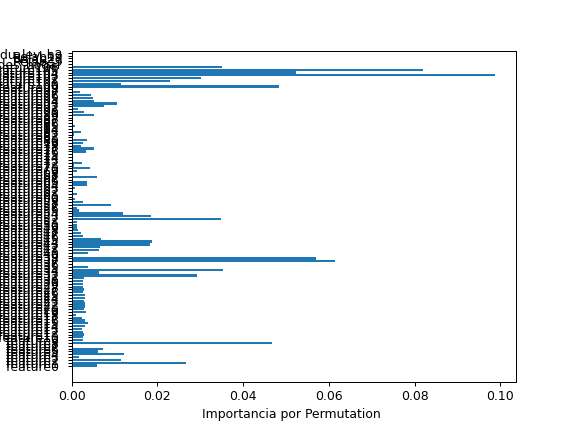

<BarContainer object of 107 artists>

In [29]:
plt.barh(nombre_variables, vars_importancia)

In [ ]:
# Importancia de variables por Permutation        

perm_importance = permutation_importance(rfc, x_test, y_test) 


sorted_vars = perm_importance.importances_mean.argsort()
plt.barh(x_train.columns.values[sorted_vars], perm_importance.importances_mean[sorted_vars] )
plt.xlabel("Importancia por Permutation ")

In [66]:
# Decision Tree Classifier:

# crear arbol DecisionTreeClassifier 
dtc1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,  max_features=15, min_samples_split=100 , random_state=0) 

# ajustar arbol con train-set 
dtc1.fit(x_train,y_train)

# crear vectores de prediccion y_hat  en trian-set y test-set
y_hat_train =dtc1.predict(x_train)
y_hat_test = dtc1.predict(x_test)

# matriz de confusion
confusion_train = confusion_matrix(y_train, y_hat_train)
confusion_test = confusion_matrix(y_test, y_hat_test)

# metricas de evaluacion

train_acc = accuracy_score(y_train, y_hat_train )
test_acc = accuracy_score(y_test, y_hat_test )

train_prec =precision_score(y_train, y_hat_train)
test_prec =precision_score(y_test, y_hat_test )

train_recall = recall_score(y_train, y_hat_train )
test_recall = recall_score(y_test, y_hat_test )

train_f1 = f1_score(y_train, y_hat_train )
test_f1 = f1_score(y_test, y_hat_test )



#print(classification_report)
print(train_acc, test_acc, train_prec, test_prec, train_recall, test_recall, train_f1, test_f1)


0.8565829890901387 0.8287842507274491 0.8192807380907551 0.5893106335473067 0.8229998108568186 0.47925099300170226 0.8211360634081903 0.5286128554440573


In [93]:
# curvas ROC y precision-recall

# calcular función de probabilidad MLE para base x
y_prob_fn_train = dtc1.predict_proba(x_train)
y_prob_fn_test = dtc1.predict_proba(x_test)


y_prob_fn_score
x_train.shape

(66087, 107)

In [25]:
# crear Gradient Boosting Classifier RF
#gbc =  GradientBoostingClassifier( learning_rate=[0.1,0.01,0.001], max_depth=9, min_samples_split=2000, n_estimators=100,  max_features=15,  , random_state=0)

# GradientBoostingClassifier Tunning
# crear GradientBoostingClassifier para sintonizar hiper parametros
gbc_tunn =  GradientBoostingClassifier(min_samples_split= 660,min_samples_leaf= 100, max_features= 10 , random_state=10)

# grid de hiper parámetros para optimizar
grid_values_tunn = {'learning_rate':[0.1,0.01,0.005], 'n_estimators':[200,500,1000]}

# crear GridSearchCV 
grid_rfc_recall = GridSearchCV(gbc_tunn, param_grid= grid_values_tunn, scoring='recall', cv=10)
grid_rfc_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_rfc_recall.best_params_)
print('Grid best score (recall): ' , grid_rfc_recall.best_score_)







KeyboardInterrupt: 

In [23]:
gbc =  GradientBoostingClassifier(n_estimators=200 , learning_rate = 0.1 , min_samples_leaf= 100, min_samples_split= 660, max_features=10 , random_state=10)
gbc.fit(x_train,y_train)

# crear vectores de prediccion y_hat  en train-set y test-set
y_hat_train =gbc.predict(x_train)
y_hat_test = gbc.predict(x_test)
# matriz de confusion
confusion_train = confusion_matrix(y_train, y_hat_train)
confusion_test = confusion_matrix(y_test, y_hat_test)

# metricas de evaluacion

train_acc = accuracy_score(y_train, y_hat_train )
test_acc = accuracy_score(y_test, y_hat_test )

train_prec =precision_score(y_train, y_hat_train)
test_prec =precision_score(y_test, y_hat_test )

train_recall = recall_score(y_train, y_hat_train )
test_recall = recall_score(y_test, y_hat_test )

train_f1 = f1_score(y_train, y_hat_train )
test_f1 = f1_score(y_test, y_hat_test )

mcm = multilabel_confusion_matrix(y_test, y_hat_test)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
specificity_test = tp / (tp + fn)

test_avg = 0.75*test_recall + 0.25*specificity_test
print(specificity_test, test_avg, train_acc, test_acc, train_prec, test_prec, train_recall, test_recall, train_f1, test_f1)


[0.92137257 0.69676734] [0.75291865 0.69676734] 0.895471121400578 0.8765155189136761 0.8809551679737797 0.6886155692215389 0.8540949498770569 0.696767339505236 0.8673171481253841 0.6926674713337356


In [86]:
# RandomForestRegressor

# crear RandomForestRegressor
class_rfr = RandomForestRegressor(random_state=0)

# crear grid de valores para hacer GridSerachCV de parametros optimos mediante validacion cruzada

grid_values = { 'n_estimators': [50,100,200,500], 'max_features':[7,8,10,15,20], 'min_samples_split':[500,1000,5000] , 'n_jobs' :[5] , 'ccp_alpha':[0,0.001,0.002,0.005,0.01,0.05,0.1,0.5,1,2.5,3] }   

# crear GridSearchCV 
grid_rfr_recall = GridSearchCV(class_rfr, param_grid= grid_values, scoring='recall')
grid_rfr_recall.fit(x_train,y_train)

print('Grid best parameter(max. recall): ', grid_rfr_recall.best_params_)
print('Grid best score (recall): ' , grid_rfr_recall.best_score_)


grid_rfr_recall



KeyboardInterrupt: 

In [85]:
# Decision Tree Regressor:

# crear arbol DecisionTreeRegressor

# crear arbol DecisionTreeClassifier 
dtr1 = DecisionTreeRegressor(criterion='squared_error', splitter = 'best' , max_depth=None,   max_features=7, min_samples_split=1000 , random_state=0) 

# ajustar arbol con train-set 
dtr1.fit(x_train,y_train)

# crear vectores de prediccion y_hat  en trian-set y test-set
y_hat_train =dtr1.predict(x_train)
y_hat_test = dtr1.predict(x_test)

# convertir y_hat en continuo

y_hat_train_disc = np.exp(y_hat_train)
y_hat_train_disc = (y_hat_train_disc/x_train['Npersug'])
y_hat_train_resu = y_hat_train_disc <= x_train_lp
y_hat_train_resu.astype(int)


y_hat_test_disc = np.exp(y_hat_test)
y_hat_test_disc = (y_hat_test_disc/x_test['Npersug'])
y_hat_test_resu = y_hat_test_disc <= x_test_lp
y_hat_test_resu.astype(int)



# matriz de confusion
confusion_train = confusion_matrix(y_train_p, y_hat_train_resu)
confusion_test = confusion_matrix(y_test_p, y_hat_test_resu)

# metricas de evaluacion

train_acc = accuracy_score(y_train_p, y_hat_train_resu)
test_acc = accuracy_score(y_test_p, y_hat_test_resu)

train_prec =precision_score(y_train_p, y_hat_train_resu)
test_prec =precision_score(y_test_p, y_hat_test_resu )

train_recall = recall_score(y_train_p, y_hat_train_resu)
test_recall = recall_score(y_test_p, y_hat_test_resu)

train_f1 = f1_score(y_train_p, y_hat_train_resu )
test_f1 = f1_score(y_test_p, y_hat_test_resu)

print(train_acc, test_acc, train_prec, test_prec, train_recall, test_recall)





0.7926067153903188 0.8181453079534433 0.755428021029819 0.5367687013222242 0.7120484206544354 0.6726309816531114
